<a href="https://colab.research.google.com/github/PDurgaAnusha/dl-lab/blob/main/experiment_7ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# mount the drive where we will save stats and loade our libraries from
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from tensorflow.keras.datasets import cifar10

In [15]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
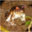

In [17]:
X_train[0]

In [18]:
X_train[0].shape

(32, 32, 3)

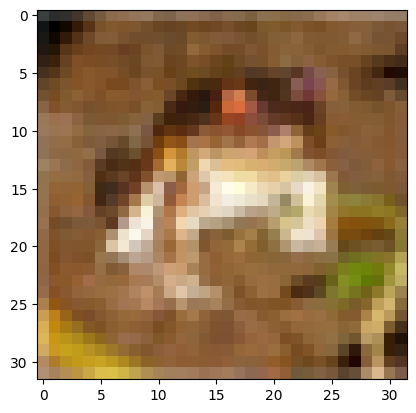

In [19]:
plt.imshow(X_train[0])

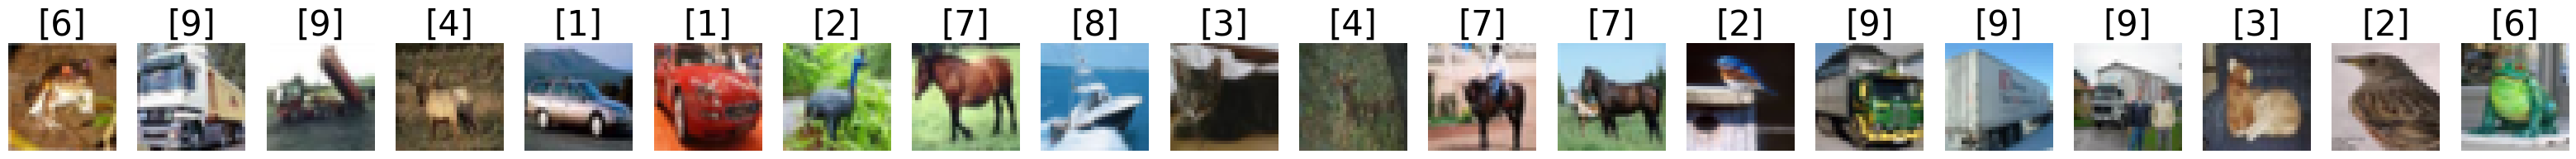

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = X_train[i]
    label = y_train[i]

    image = row
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [22]:
X_train/=255
X_test/=255

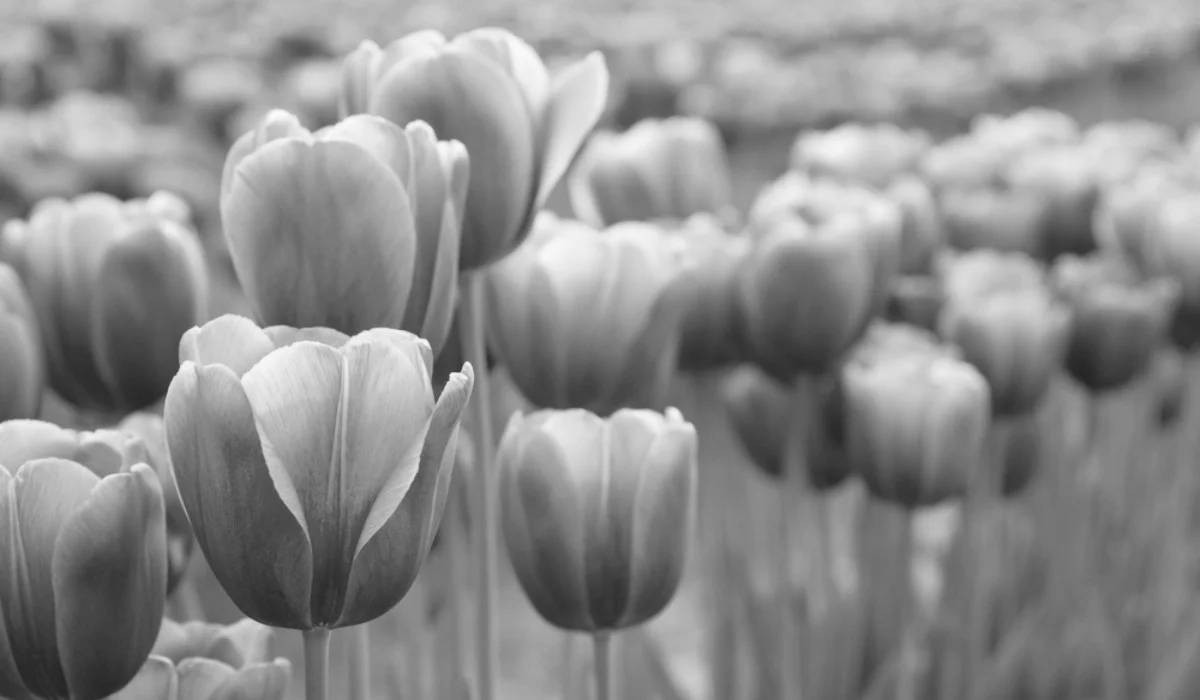

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# read a image using imread
img = cv2.imread('flower.jpg',0)
cv2_imshow(img)

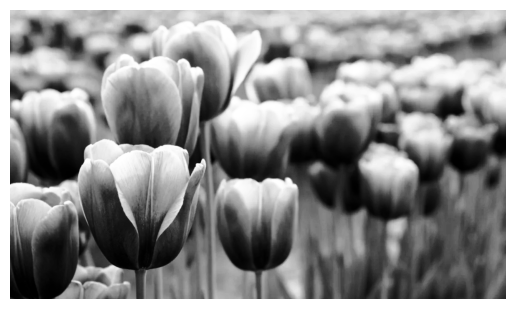

In [29]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'img' is your input image
equ = cv2.equalizeHist(img)

# Display the equalized image using plt.imshow() (for local environment or Jupyter Notebook)
plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

# Or if you are using Google Colab, use cv2_imshow()
# cv2_imshow(equ)


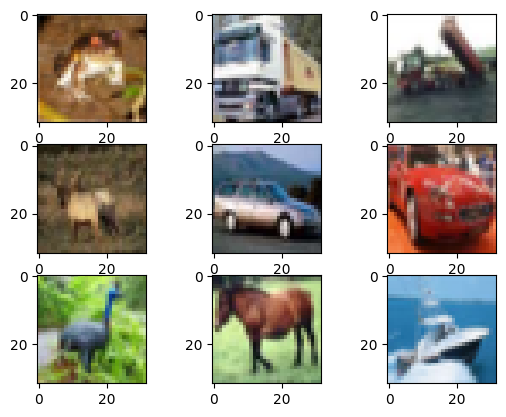

In [30]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [27]:
# set up image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)
datagen.fit(X_train)

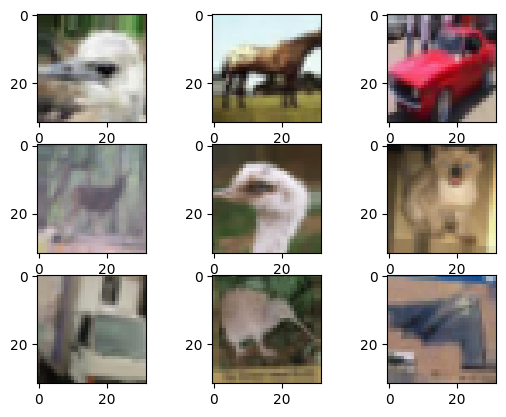

In [31]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

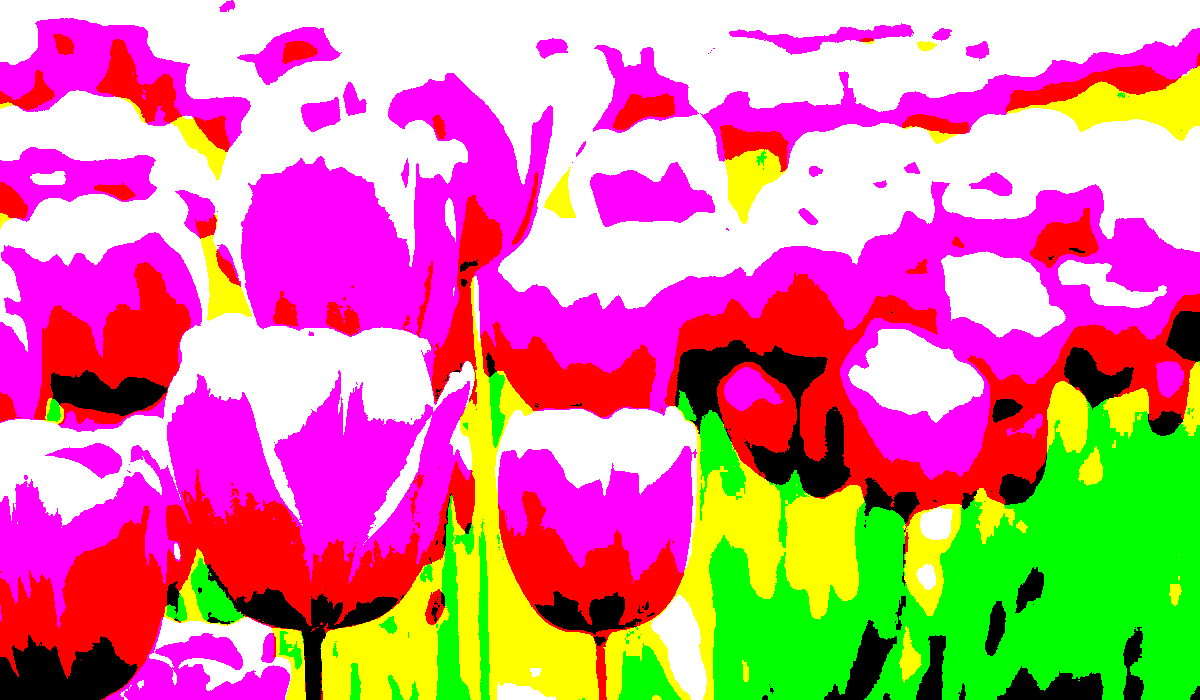

In [50]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/flower.jpg')
threshold_value = 120
max_val = 255
ret, image = cv2.threshold(image, threshold_value, max_val, cv2.THRESH_BINARY)
cv2_imshow(image)


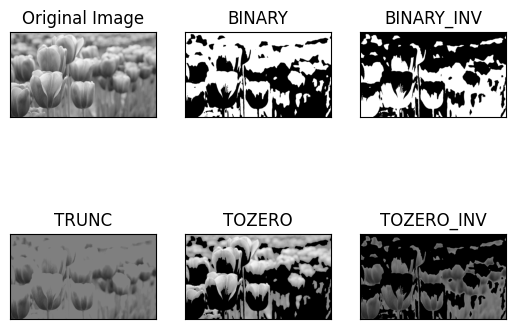

In [51]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/flower.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

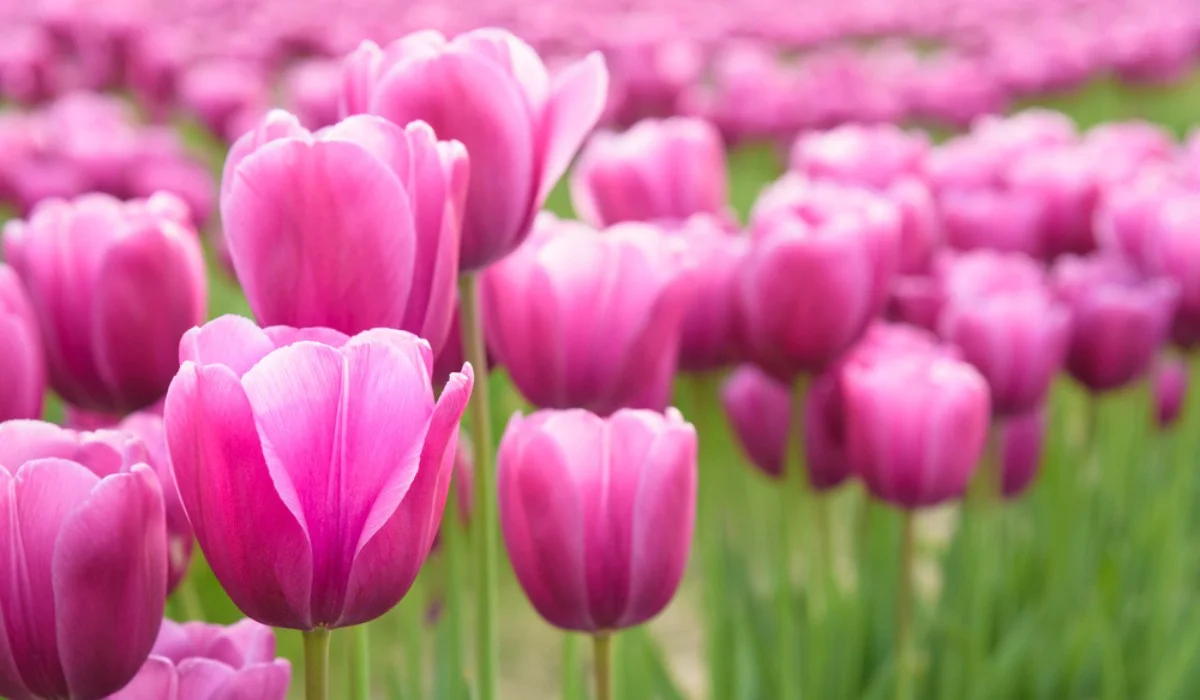

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read the image
image = cv2.imread("flower.jpg")
cv2_imshow(image)

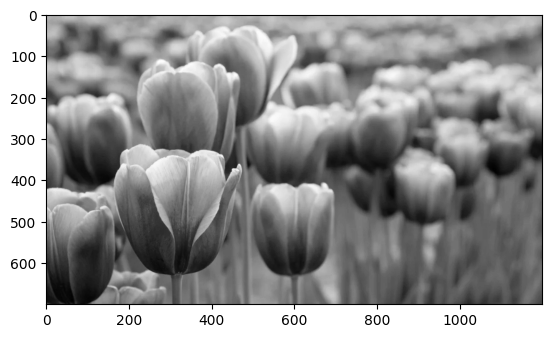

In [53]:
# convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show the grayscale image
plt.imshow(gray, cmap="gray")
plt.show()

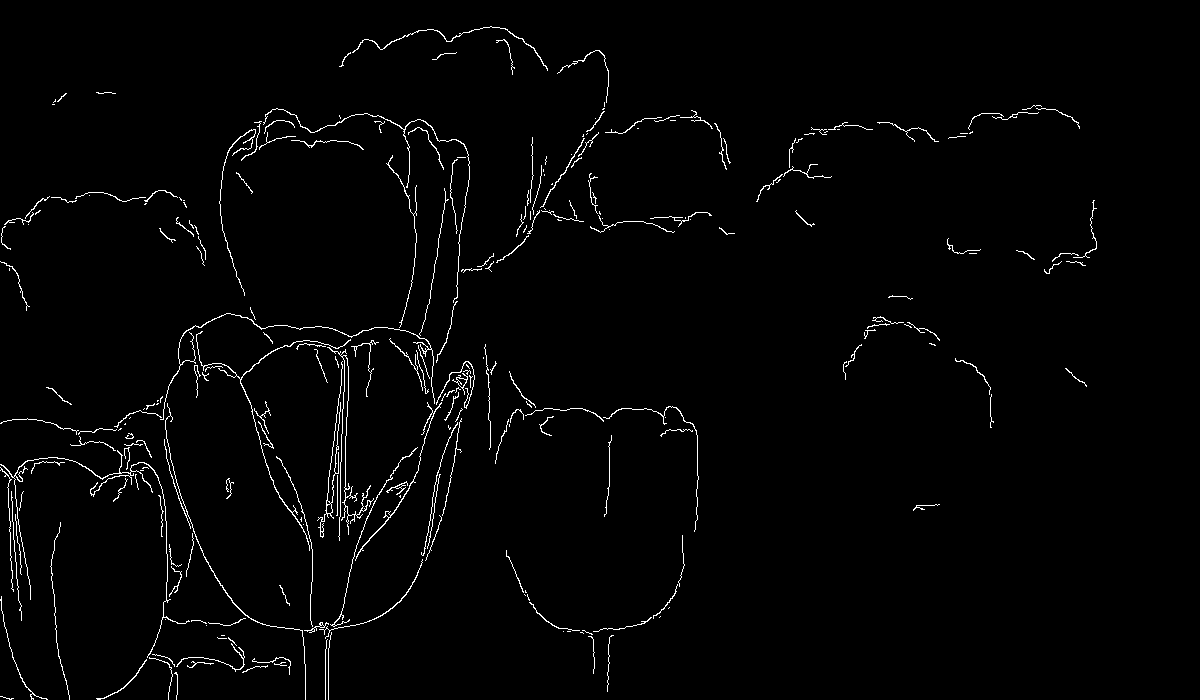

In [54]:
# perform the canny edge detector to detect image edges
edges = cv2.Canny(gray, threshold1=30, threshold2=100)
cv2_imshow(edges)